In [123]:
import numpy as np
import pandas as pd
import graphviz
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#setting up random mean and deviation
N1=1000
u1=5
s1=2
x1=np.random.normal(u1,s1,N1)
c1=np.repeat('c1',N1)
df1=df1 = pd.DataFrame(dict(zip(['x1','c'],[x1,c1])))
df1.head()


,x1,c
0,5.998139,c1
1,3.873382,c1
2,1.497831,c1
3,6.611403,c1
4,6.303691,c1


In [124]:
#settig up random mean and deviation
N2=1000
u2=-5
s2=2


x2=np.random.normal(u2,s2,N2)
#c2=np.repeat('c2',N2)
#df2 = pd.DataFrame(dict(zip(['x2','c2'],[x2,c2])))
df2 = pd.DataFrame(dict(zip(['x2','c'],[x2,c1])))
df2.head()

,x2,c
0,-4.518386,c1
1,-4.291230,c1
2,-6.103960,c1
3,-4.897366,c1
4,-4.913294,c1


In [125]:
#Add x2 from df2 to df1
df1['x2']=df2['x2']

In [126]:

#Drop the 'c' column
df1 = df1.drop(columns=['c'])
df1

,x1,x2
0,5.998139,-4.518386
1,3.873382,-4.291230
2,1.497831,-6.103960
3,6.611403,-4.897366
4,6.303691,-4.913294
...,...,...
995,2.363515,-7.205274
996,4.172268,-2.054354
997,4.214760,-4.545241
998,7.021747,-7.532389


In [127]:
#Generate a random label of 0 and 1
import random
randomLabel = []
for i in range(0,1000):
    n = random.randint(0, 1)
    randomLabel.append(n)

#Add that label to df1
df1['Label'] = randomLabel
df1

,x1,x2,Label
0,5.998139,-4.518386,0
1,3.873382,-4.291230,1
2,1.497831,-6.103960,0
3,6.611403,-4.897366,1
4,6.303691,-4.913294,0
...,...,...,...
995,2.363515,-7.205274,1
996,4.172268,-2.054354,1
997,4.214760,-4.545241,0
998,7.021747,-7.532389,0


In [128]:

df1.describe()


,x1,x2,Label
count,1000.000000,1000.000000,1000.000000
mean,5.011384,-5.035538,0.467000
std,1.990079,2.038471,0.499159
min,-2.821523,-11.762593,0.000000
25%,3.652863,-6.389372,0.000000
50%,4.918598,-5.019275,0.000000
75%,6.337419,-3.672967,1.000000
max,10.899816,1.289223,1.000000


In [129]:
#Set-up data as samples and features
X = df1.drop('Label', axis = 1)
y = df1['Label']

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 569. X_train = 455/569 = 0.8 & X_test = 114/569 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


[Text(133.92000000000002, 181.2, 'X[1] <= -9.756\ngini = 0.497\nsamples = 800\nvalue = [433, 367]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 9.796\ngini = 0.497\nsamples = 793\nvalue = [426, 367]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.497\nsamples = 783\nvalue = [424, 359]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]')]

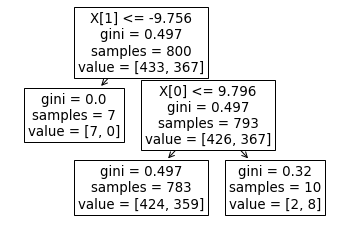

In [130]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)


In [131]:
#Calculate the empirical distribution
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x2)
ecdf(-9.756)

0.010000000000000002

The empirical distribution for the above decision tree is 1.0%. 

The threshold above split in a manner that 793/800 of the samples split to the right and 7 to the left. it is less than 10% split to the left. 

This follows similar to the empirical distribution.

# Following code are useless. i just want to verifty in another way. (but not successed)

In [12]:
import numpy as np
import random
random.seed(2342)
a = np.random.randn(10,1)
b = np.random.randn(10,1)
c = np.hstack((a,b))
label = np.vstack((np.zeros(5) , np.ones(5))).flatten()
print (label)
random.shuffle(label) 
print (label)


from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=5)
clf=clf.fit(c,label)

clf.predict(c)


[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]


array([0., 1., 1., 0., 1., 0., 1., 0., 0., 1.])

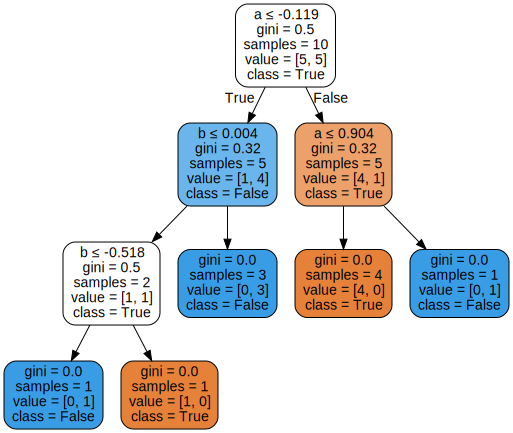

In [13]:

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=np.array(['a','b']),  
                         class_names=np.array(['True', 'False']),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [5]:
big_df=pd.concat([df1,df2],  axis=1)
big_df.describe

<bound method NDFrame.describe of           x1  c1        x2  c2
0   4.120025  c1 -3.982663  c2
1   4.062360  c1 -2.225822  c2
2   4.252531  c1 -5.648235  c2
3   7.927300  c1 -5.697833  c2
4   7.523486  c1 -7.354401  c2
..       ...  ..       ...  ..
95  5.211458  c1 -4.224333  c2
96  5.973898  c1 -8.197296  c2
97  7.521344  c1 -4.734819  c2
98  5.334874  c1 -5.534459  c2
99  5.510840  c1 -4.116002  c2

[100 rows x 4 columns]>

In [6]:
big_df.columns
big_df.describe

<bound method NDFrame.describe of           x1  c1        x2  c2
0   4.120025  c1 -3.982663  c2
1   4.062360  c1 -2.225822  c2
2   4.252531  c1 -5.648235  c2
3   7.927300  c1 -5.697833  c2
4   7.523486  c1 -7.354401  c2
..       ...  ..       ...  ..
95  5.211458  c1 -4.224333  c2
96  5.973898  c1 -8.197296  c2
97  7.521344  c1 -4.734819  c2
98  5.334874  c1 -5.534459  c2
99  5.510840  c1 -4.116002  c2

[100 rows x 4 columns]>

In [17]:
from sklearn import tree
from sklearn import model_selection
#X_train, X_test, y_train, y_test = model_selection.train_test_split
#(big_df.columns,big_df.describe,test_size=0.2)


In [16]:
clf=tree.DecisionTreeClassifier(max_depth=2)
print(clf)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 3., 1., 0., 2., 0., 0., 0., 0., 0., 0., 5., 2., 1., 2., 1.,
        0., 2., 0., 2., 1., 2., 2., 2., 1., 2., 1., 5., 1., 3., 1., 2., 4.,
        2., 0., 4., 0., 2., 3., 2., 3., 2., 2., 3., 2., 2., 0., 1., 2., 0.,
        2., 3., 0., 0., 1., 3., 0., 1., 0., 0., 0., 0., 0., 0., 3., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.59739061, -1.4705023 , -1.343614  , -1.21672569, -1.08983738,
        -0.96294908, -0.83606077, -0.70917247, -0.58228416, -0.45539585,
        -0.32850755, -0.20161924, -0.07473093,  0.05215737,  0.17904568,
         0.30593399,  0.43282229,  0.5597106 ,  0.6865989 ,  0.81348721,
         0.94037552,  1.06726382,  1.19415213,  1.32104044,  1.44792874,
         1.57481705,  1.70170536,  1.82859366,  1.95548197,  2.08237027,
         2.20925858,  2.33614689,  2.46303519,  2.5899235 ,  2.71681181,
         2.84370011,  2.97058842,  3.09

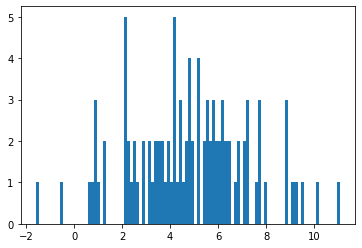

In [15]:
import matplotlib.pyplot as plt
plt.hist(x1,bins=100)

(array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 2., 1.,
        0., 0., 0., 3., 0., 1., 0., 2., 3., 2., 1., 1., 0., 1., 3., 2., 2.,
        0., 0., 0., 5., 0., 2., 1., 3., 3., 3., 1., 2., 2., 1., 1., 1., 3.,
        1., 3., 3., 0., 1., 4., 5., 3., 0., 2., 1., 1., 3., 0., 1., 2., 2.,
        0., 1., 0., 1., 0., 1., 1., 1., 2., 0., 0., 2., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1.]),
 array([-9.89641937, -9.7960737 , -9.69572802, -9.59538234, -9.49503666,
        -9.39469099, -9.29434531, -9.19399963, -9.09365396, -8.99330828,
        -8.8929626 , -8.79261692, -8.69227125, -8.59192557, -8.49157989,
        -8.39123422, -8.29088854, -8.19054286, -8.09019719, -7.98985151,
        -7.88950583, -7.78916015, -7.68881448, -7.5884688 , -7.48812312,
        -7.38777745, -7.28743177, -7.18708609, -7.08674041, -6.98639474,
        -6.88604906, -6.78570338, -6.68535771, -6.58501203, -6.48466635,
        -6.38432067, -6.283975  , -6.18

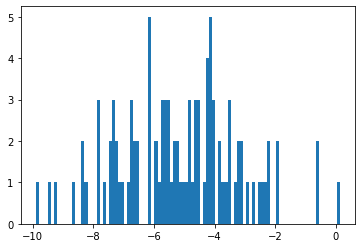

In [14]:
plt.hist(x2,bins=100)